In [ ]:
# Modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import csv
from feature_ablation import *


# Files 
x_train_csv = "dataset/x_train.csv"
y_train_csv = "dataset/y_train.csv"
x_test_csv = "dataset/x_test.csv"




###  Feature ablation study

Model is evaluated by introducing each feature sequentially, and adding it permanently if it results in an improvement of the F1 score, or discarding it otherwise.

**Dictionary with features to be analyzed**

In [69]:
features_dict = {
    # Binary variables
    'BPMEDS': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'TOLDHI2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIABETE3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HLTHPLN1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'QLACTLM2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'EXERANY2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ADDEPEV2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ASTHMA3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'SMOKE100': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'CVDSTRK3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HAVARTH3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'CHCCOPD1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'SEX': {'type': 'binary', 'missing_values': [np.nan]},
    'BPHIGH4': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'USEEQUIP': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'BLIND': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DECIDE': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIFFWALK': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIFFDRES': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIFFALON': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ALCDAY5': {'type': 'binary', 'missing_values': [np.nan]},
    'CHECKUP1': {'type': 'binary', 'missing_values': [np.nan]},
    'STRENGTH': {'type': 'binary', 'missing_values': [np.nan]},
    'AVG_FRUITS_VEGS': {'type': 'binary', 'missing_values': [np.nan]},
    '_RFBING5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_AGE65YR': {'type': 'binary', 'missing_values': [ np.nan]},
     '_RFDRHV5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_TOTINDA': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PAINDX1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PASTRNG': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PASTAE1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_FLSHOT6': {'type': 'binary', 'missing_values': [ 9,np.nan]},
     '_PNEUMO2': {'type': 'binary', 'missing_values': [ 9,np.nan]},
     '_AIDTST3': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFBMI5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_HISPANC': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_CASTHM1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_LTASTH1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFCHOL': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFHYPE5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_HCVU651': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFHLTH': {'type': 'binary', 'missing_values': [9, np.nan]},
     'MEDCOST': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'BLOODCHO': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'ASTHNOW': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCSCNCR': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCCOPD1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCOCNCR': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCKIDNY': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'VETERAN3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'INTERNET': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'LMTJOIN3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'ARTHDIS2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     



    # Categorical variable
    '_RACEGR3': {
        'type': 'categorical',
        'missing_values': [9, np.nan],
        'categories': [1, 2, 3, 4, 5]
    },

    # Numeric variables
    #'_DRNKWEK': {'type': 'numeric', 'missing_values': [99900, np.nan], 'range': (1, 6)},
    '_PAREC1': {'type': 'numeric', 'missing_values': [9, np.nan], 'range': (1, 6)},
    '_PA150R2': {'type': 'numeric', 'missing_values': [ 9,np.nan], 'range': (1, 6)},
    '_PACAT1': {'type': 'numeric', 'missing_values': [9], 'range': (1, 6)},
    'FC60_': {'type': 'numeric', 'missing_values': [ 99900], 'range': (1, 6)},
    'MAXVO2_': {'type': 'numeric', 'missing_values': [ 99900], 'range': (1, 6)},
    'EDUCA': {'type': 'numeric', 'missing_values': [9, np.nan], 'range': (1, 6)},  # Education level
    '_INCOMG': {'type': 'numeric', 'missing_values': [9, np.nan], 'range': (1, 6)},
    'BMI': {'type': 'numeric', 'missing_values': [7777, 9999, np.nan], 'range': (1, 4)},
    'MENTHLTH': {'type': 'numeric', 'missing_values': [77, 99, np.nan], 'map_value': {88: 0}, 'range': (1, 30)},
    '_AGEG5YR': {'type': 'numeric', 'missing_values': [14, np.nan], 'range': (1, 13)},
    'PHYSHLTH': {'type': 'numeric', 'missing_values': [77, 99, np.nan], 'map_value': {88: 0}, 'range': (1, 30)}
}

features_dict_numeric = {
        #'_DRNKWEK': {'type': 'numeric', 'missing_values': [99900, np.nan], 'range': (1, 6)},
    '_PAREC1': {'type': 'numeric', 'missing_values': [9, np.nan], 'range': (1, 6)},
    '_PA150R2': {'type': 'numeric', 'missing_values': [ 9,np.nan], 'range': (1, 6)},
    '_PACAT1': {'type': 'numeric', 'missing_values': [9], 'range': (1, 6)},
    'FC60_': {'type': 'numeric', 'missing_values': [ 99900], 'range': (1, 6)},
    'MAXVO2_': {'type': 'numeric', 'missing_values': [ 99900], 'range': (1, 6)},
    'EDUCA': {'type': 'numeric', 'missing_values': [9, np.nan], 'range': (1, 6)},  # Education level
    '_INCOMG': {'type': 'numeric', 'missing_values': [9, np.nan], 'range': (1, 6)},
    'BMI': {'type': 'numeric', 'missing_values': [7777, 9999, np.nan], 'range': (1, 4)},
    'MENTHLTH': {'type': 'numeric', 'missing_values': [77, 99, np.nan], 'map_value': {88: 0}, 'range': (1, 30)},
    '_AGEG5YR': {'type': 'numeric', 'missing_values': [14, np.nan], 'range': (1, 13)},
    'PHYSHLTH': {'type': 'numeric', 'missing_values': [77, 99, np.nan], 'map_value': {88: 0}, 'range': (1, 30)}
}


features_dict_binary = {
    # Binary variables
    'BPMEDS': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'TOLDHI2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIABETE3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HLTHPLN1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'QLACTLM2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'EXERANY2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ADDEPEV2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ASTHMA3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'SMOKE100': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'CVDSTRK3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HAVARTH3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'CHCCOPD1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'SEX': {'type': 'binary', 'missing_values': [np.nan]},
    'BPHIGH4': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'USEEQUIP': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'BLIND': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DECIDE': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIFFWALK': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIFFDRES': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'DIFFALON': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ALCDAY5': {'type': 'binary', 'missing_values': [np.nan]},
    'CHECKUP1': {'type': 'binary', 'missing_values': [np.nan]},
    'STRENGTH': {'type': 'binary', 'missing_values': [np.nan]},
    'AVG_FRUITS_VEGS': {'type': 'binary', 'missing_values': [np.nan]},
    '_RFBING5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_AGE65YR': {'type': 'binary', 'missing_values': [ np.nan]},
     '_RFDRHV5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_TOTINDA': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PAINDX1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PASTRNG': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PASTAE1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_FLSHOT6': {'type': 'binary', 'missing_values': [ 9,np.nan]},
     '_PNEUMO2': {'type': 'binary', 'missing_values': [ 9,np.nan]},
     '_AIDTST3': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFBMI5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_HISPANC': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_CASTHM1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_LTASTH1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFCHOL': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFHYPE5': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_HCVU651': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_RFHLTH': {'type': 'binary', 'missing_values': [9, np.nan]},
     'MEDCOST': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'BLOODCHO': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'ASTHNOW': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCSCNCR': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCCOPD1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCOCNCR': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'CHCKIDNY': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'VETERAN3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'INTERNET': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'LMTJOIN3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'ARTHDIS2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
}


selected_features_dict = {
    # Binary variables
    'BPMEDS': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'TOLDHI2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HLTHPLN1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'QLACTLM2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'EXERANY2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ADDEPEV2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'ASTHMA3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'CVDSTRK3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HAVARTH3': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'CHCCOPD1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'BPHIGH4': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'BLIND': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     '_PASTRNG': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_PASTAE1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_FLSHOT6': {'type': 'binary', 'missing_values': [ 9,np.nan]},
     '_PNEUMO2': {'type': 'binary', 'missing_values': [ 9,np.nan]},
     '_AIDTST3': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_HISPANC': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_CASTHM1': {'type': 'binary', 'missing_values': [9, np.nan]},
     '_HCVU651': {'type': 'binary', 'missing_values': [9, np.nan]},
     'CHCSCNCR': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
     'INTERNET': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'MENTHLTH': {'type': 'numeric', 'missing_values': [77, 99, np.nan], 'map_value': {88: 0}, 'range': (1, 30)},
    


}

selected_features_dict = {
    # Binary variables
    'BPMEDS': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'TOLDHI2': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'HLTHPLN1': {'type': 'binary', 'missing_values': [7, 9, np.nan]},
    'QLACTLM2': {'type': 'binary', 'missing_values': [7, 9, np.nan]}
}




'BPMEDS', 'TOLDHI2', 'HLTHPLN1', 'QLACTLM2', 'EXERANY2', 'ADDEPEV2', 'ASTHMA3', 'CVDSTRK3', 'HAVARTH3', 'CHCCOPD1', 'BPHIGH4', 'BLIND', '_PASTRNG', '_PASTAE1', '_FLSHOT6', '_PNEUMO2', '_AIDTST3', '_HISPANC', '_CASTHM1', '_HCVU651', 'CHCSCNCR', 'INTERNET', 'MENTHLTH'

('BPMEDS',
 'TOLDHI2',
 'HLTHPLN1',
 'QLACTLM2',
 'EXERANY2',
 'ADDEPEV2',
 'ASTHMA3',
 'CVDSTRK3',
 'HAVARTH3',
 'CHCCOPD1',
 'BPHIGH4',
 'BLIND',
 '_PASTRNG',
 '_PASTAE1',
 '_FLSHOT6',
 '_PNEUMO2',
 '_AIDTST3',
 '_HISPANC',
 '_CASTHM1',
 '_HCVU651',
 'CHCSCNCR',
 'INTERNET',
 'MENTHLTH')

In [ ]:
# Read x_train and y_train
x_train, features = csv_to_array("dataset/x_train.csv")
Y_train, labels = csv_to_array("dataset/y_train.csv")
x_test , ids = csv_to_array("dataset/x_test.csv", id=True)
# Flatten y_train to convert into 1d array
Y_train = Y_train.flatten()
# Y modification
Y_train = np.where(Y_train == -1, 0, Y_train)


In [ ]:
X_train, features = X_preprocessing(x_train, features)
X_test, _ = X_preprocessing(x_test, features)

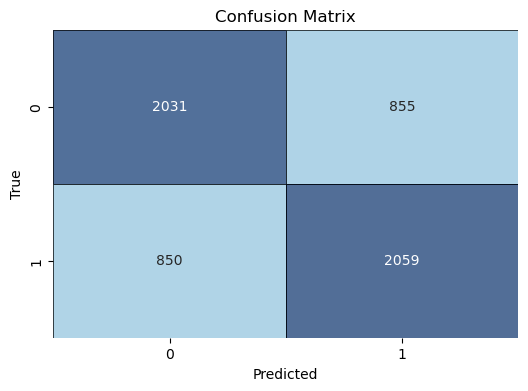

accuracy:0.7057808455565142 , F1 score: 0.707195603640735


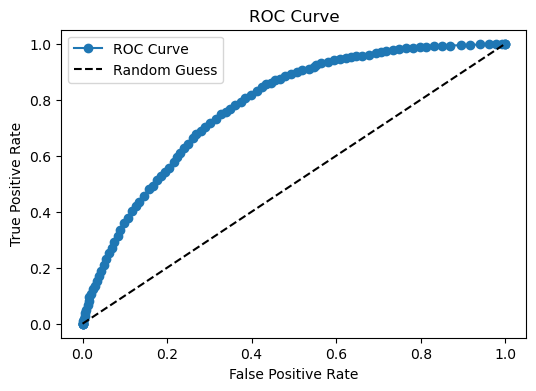

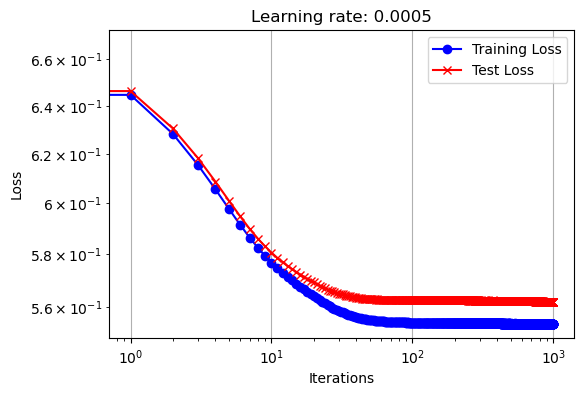

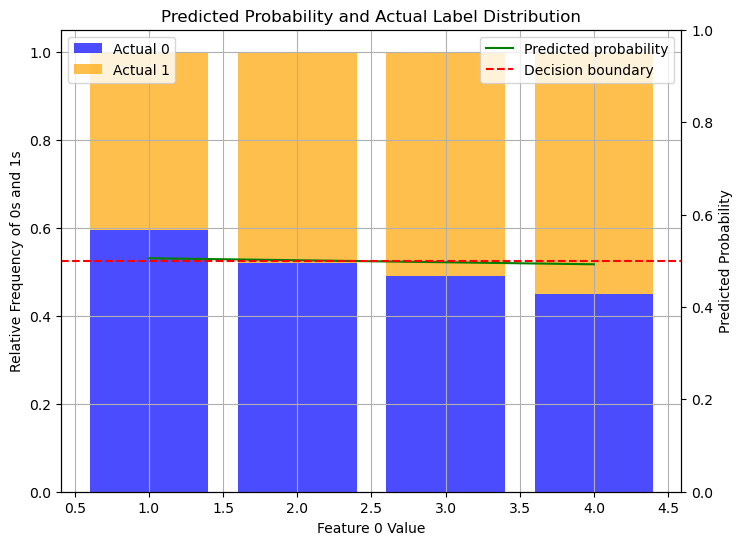

In [70]:

X_train_balanced, Y_train_balanced = balance_dataset(X_train, Y_train)
X_train_transformed = transform_features_column_median(X_train_balanced, features_dict_numeric, features )
X_test_transformed = transform_features_column_median(X_test, features_dict_numeric, features )
N = Y_train_balanced.shape[0]
max_iters=1000
gamma= 0.0005
beta1=0.9
beta2=0.97
reg_norm= ['l2', 0.01]
prob_threshold=0.52
batch_size=4096
decay_rate=0.96
decay_steps=100
plot=True
initial_w =  np.random.rand(np.shape(X_train_transformed)[1] ) * 0
N = np.shape(Y_train_balanced)[0] # number of samples
random_index = np.random.permutation(N)
# Proportion trainig: 0.9; test: 0.1
N_train = int(0.9 * N)
training_index = random_index[:N_train]
test_index = random_index[N_train:]
x_tr = X_train_transformed[training_index]
x_te = X_train_transformed[test_index]
y_tr = Y_train_balanced[training_index]
y_te = Y_train_balanced[test_index]

w, losses_tr, losses_te = reg_logistic_regression(
    y_tr, x_tr, y_te, x_te, initial_w, max_iters=max_iters,gamma= gamma,reg_norm= reg_norm,batch_size= batch_size, beta1=beta1, beta2=beta2,
    decay_rate=decay_rate, decay_steps=decay_steps)

# TEST 
y_prob = sigmoid(X_test_transformed @ w)
y_pred =np.where(y_prob < prob_threshold, -1, 1) # if below threshold 0 otherwise 1

# VALIDATION
y_prob_tr = sigmoid(x_te @ w)
y_pred_tr =np.where(y_prob_tr < prob_threshold, 0, 1) # if below threshold 0 otherwise 1
accuracy, F1_score = F1_score_f(y_te, y_pred_tr,plot=plot)
print(f'accuracy:{accuracy} , F1 score: {F1_score}')



# Analyze feature distributions for FN and FP
#analyze_feature_distribution(x_te, y_te, FN_indices, FP_indices)


if plot:
    plot_roc_curve(y_te, y_prob_tr)
    plot_loss_iter(losses_train=losses_tr, losses_test=losses_te, max_iters=max_iters, gamma=gamma)
    plot_prediction_vs_feature(x_te, y_te, w, feature_index=0)


# Define the output filename
name = "submission.csv"


# Create the CSV submission file
#create_csv_submission(ids, y_pred, name)

In [ ]:
N = Y_train_balanced.shape[0]
max_iters= 1000
gamma= 0.001
beta1=0.9
beta2=0.97
reg_norm= ['l2', 0.001]
prob_threshold=0.52
batch_size=4096
decay_rate=0.96
decay_steps=100
plot= False
selected_features = []
best_f1_score = 0  # Initialize best F1 score to zero

# Iterate over each feature in features_dict
for feature in features_dict.keys():
    # Include selected features + current feature to test
    current_features = selected_features + [feature]
    X_train, features = X_preprocessing(x_train, features)
    X_test, _ = X_preprocessing(x_test, features)
    X_train_balanced, Y_train_balanced = balance_dataset(X_train, Y_train)
    
    # Transform the training and test data for the current feature set
    X_train_transformed = transform_features_column_median(X_train_balanced, 
                                                               {f: features_dict[f] for f in current_features}, 
                                                               features)
    
    # Proportion trainig: 0.9; test: 0.1
    initial_w =  np.random.rand(np.shape(X_train_transformed)[1] ) * 0
    N = np.shape(Y_train_balanced)[0] # number of samples
    random_index = np.random.permutation(N)
    N_train = int(0.9 * N)
    training_index = random_index[:N_train]
    test_index = random_index[N_train:]
    x_tr = X_train_transformed[training_index]
    x_te = X_train_transformed[test_index]
    y_tr = Y_train_balanced[training_index]
    y_te = Y_train_balanced[test_index]       

    # Train the model on the transformed dataset
    w, _, _ = reg_logistic_regression(
         y_tr, x_tr, y_te, x_te, initial_w, max_iters=max_iters,gamma= gamma,reg_norm= reg_norm,batch_size= batch_size, beta1=beta1, beta2=beta2,
    decay_rate=decay_rate, decay_steps=decay_steps
    )
    
    # Predict on the test data
    y_prob = sigmoid(x_te @ w)
    y_pred = np.where(y_prob < prob_threshold, 0, 1)
    
    # Calculate accuracy and F1 score
    accuracy, f1_score = F1_score_f(y_te, y_pred, plot=False)
    
    # Check if the F1 score improves
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        selected_features.append(feature)  # Keep the feature
        print(f"Feature {feature} kept with F1 score: {f1_score:.4f}")
    else:
        print(f"Feature {feature} discarded with F1 score: {f1_score:.4f}")

# Final model training on the selected features
X_train_final = transform_features_column_median(X_train_balanced, {f: features_dict[f] for f in selected_features}, features)


final_w, losses_tr, losses_te = reg_logistic_regression(
     y_tr, x_tr, y_te, x_te, initial_w, max_iters=max_iters,
    gamma=gamma, reg_norm=reg_norm, batch_size=batch_size, beta1=beta1, beta2=beta2,
    decay_rate=decay_rate, decay_steps=decay_steps
)



print("Selected features:", selected_features)

C:\Users\beaiz\AppData\Local\Temp\ipykernel_12936\2640125197.py:1170: RuntimeWarning: Mean of empty slice
  average_column = np.nanmean(selected_columns, axis=1)


Feature BPMEDS kept with F1 score: 0.0041
Feature TOLDHI2 kept with F1 score: 0.0248
Feature DIABETE3 kept with F1 score: 0.0324
Feature HLTHPLN1 discarded with F1 score: 0.0281
Feature QLACTLM2 kept with F1 score: 0.0421
Feature EXERANY2 kept with F1 score: 0.0438
Feature ADDEPEV2 kept with F1 score: 0.0540
Feature ASTHMA3 kept with F1 score: 0.0616
Feature SMOKE100 kept with F1 score: 0.0726
Feature CVDSTRK3 kept with F1 score: 0.0918
Feature HAVARTH3 discarded with F1 score: 0.0891
Feature CHCCOPD1 kept with F1 score: 0.0960
Feature SEX kept with F1 score: 0.0995
Feature BPHIGH4 discarded with F1 score: 0.0958


KeyboardInterrupt: 

C:\Users\beaiz\AppData\Local\Temp\ipykernel_12936\2640125197.py:1170: RuntimeWarning: Mean of empty slice
  average_column = np.nanmean(selected_columns, axis=1)


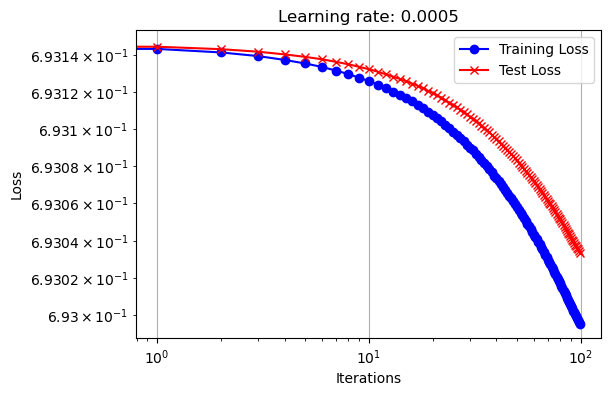

Feature BPMEDS kept with F1 score: 0.0021


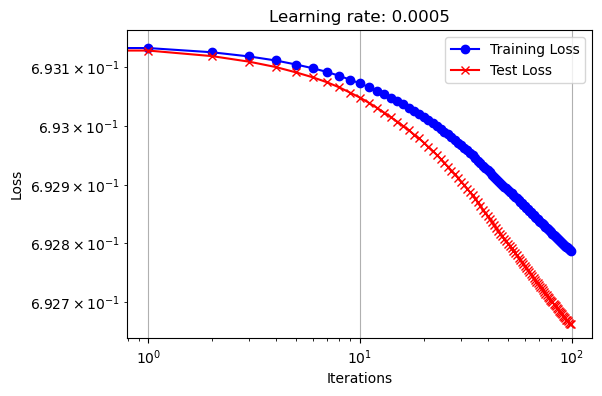

Feature TOLDHI2 kept with F1 score: 0.0287


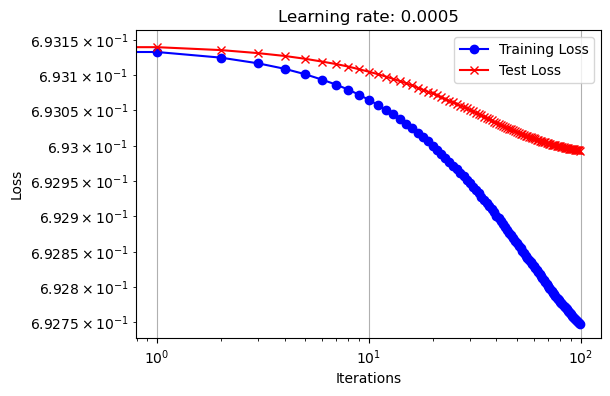

Feature DIABETE3 discarded with F1 score: 0.0206


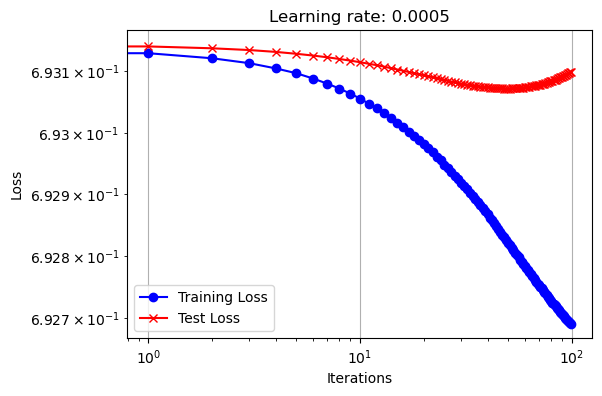

Feature HLTHPLN1 discarded with F1 score: 0.0229


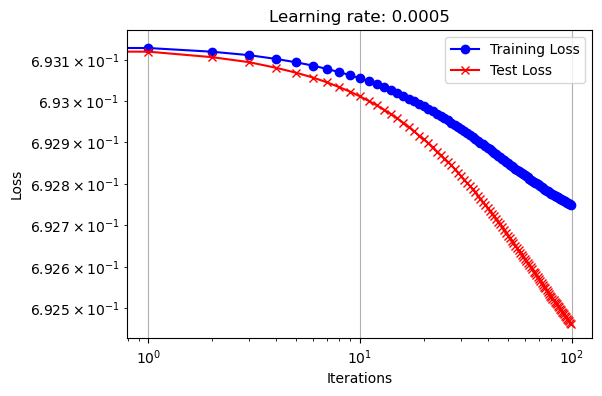

Feature QLACTLM2 kept with F1 score: 0.0416


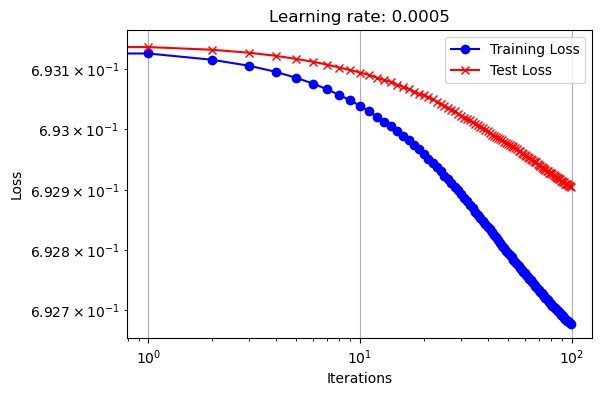

Feature EXERANY2 discarded with F1 score: 0.0315


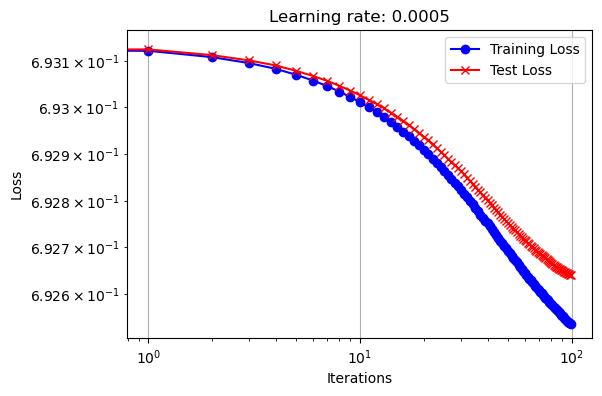

Feature ADDEPEV2 kept with F1 score: 0.0486


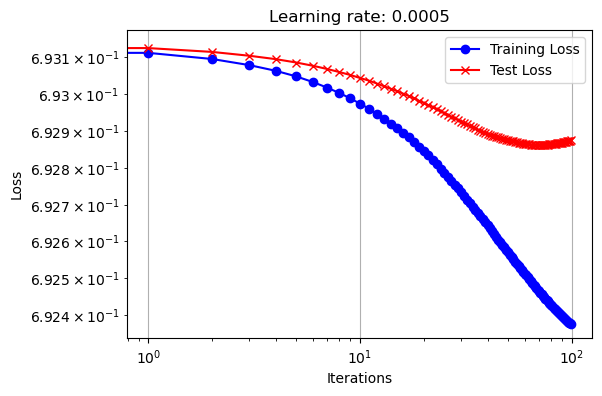

Feature ASTHMA3 kept with F1 score: 0.0620


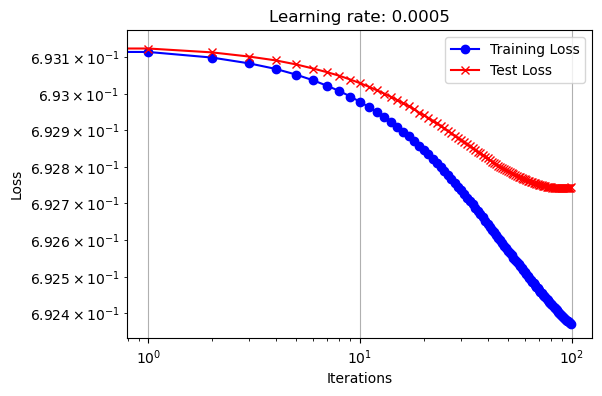

Feature SMOKE100 kept with F1 score: 0.0625


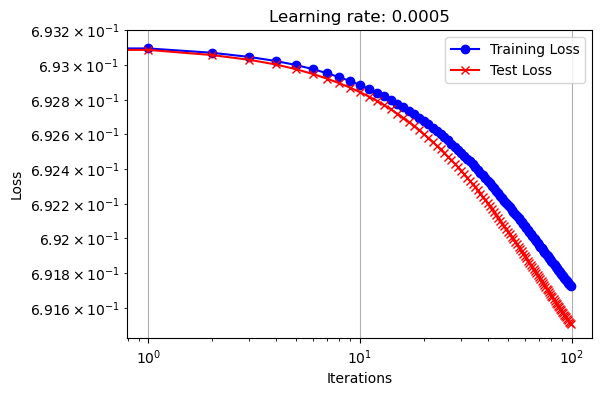

Feature CVDSTRK3 kept with F1 score: 0.0755


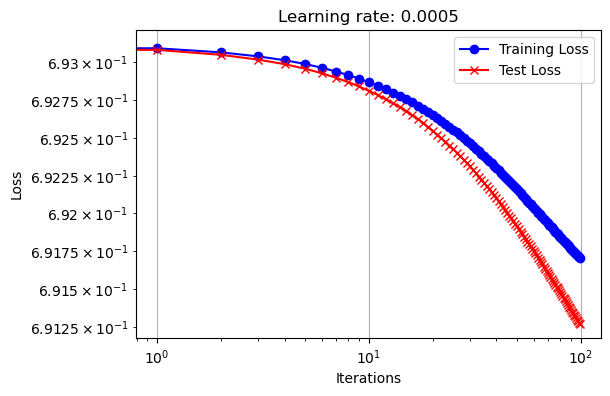

Feature HAVARTH3 kept with F1 score: 0.0914


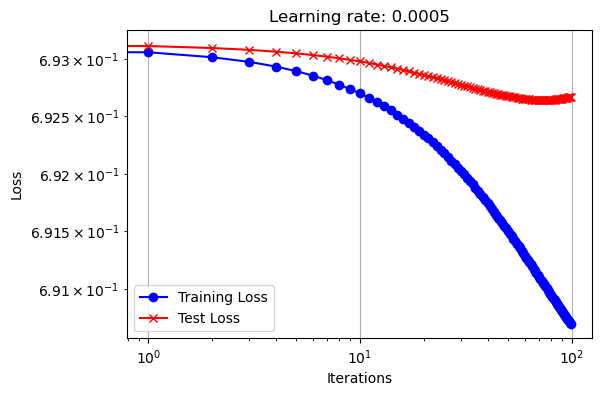

Feature CHCCOPD1 discarded with F1 score: 0.0836


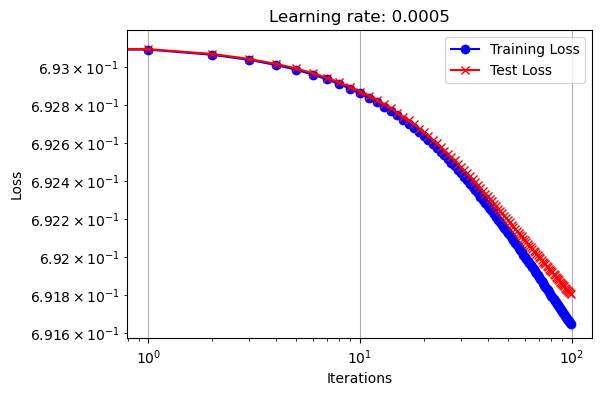

Feature SEX discarded with F1 score: 0.0901


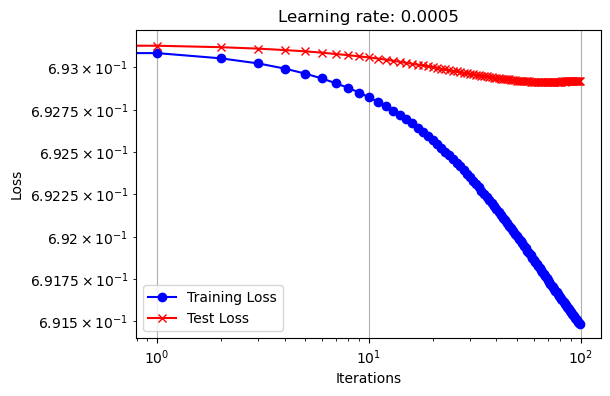

Feature BPHIGH4 discarded with F1 score: 0.0769


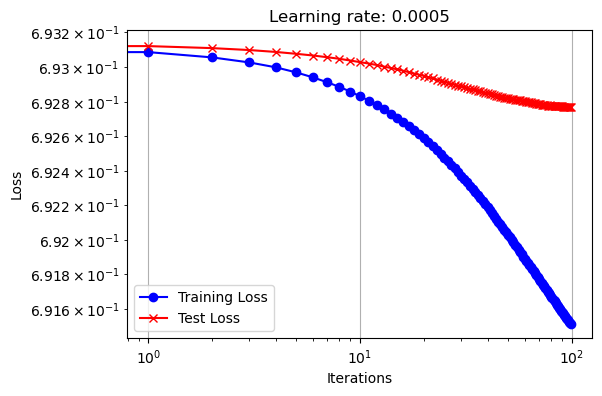

Feature USEEQUIP discarded with F1 score: 0.0790


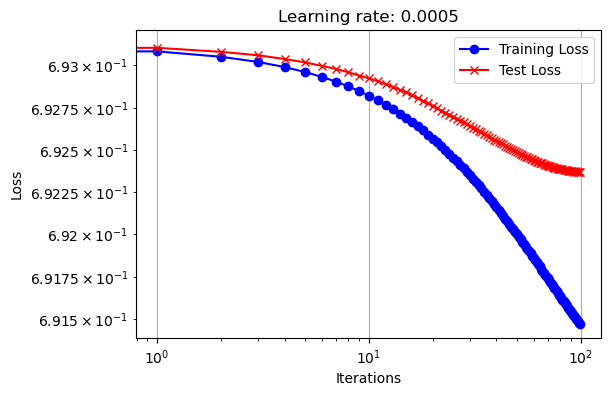

Feature BLIND discarded with F1 score: 0.0896


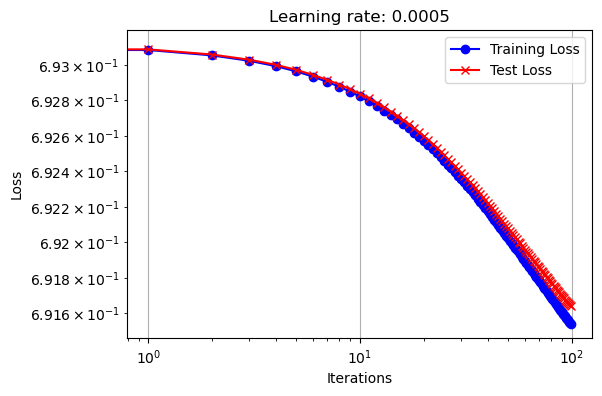

Feature DECIDE kept with F1 score: 0.0942


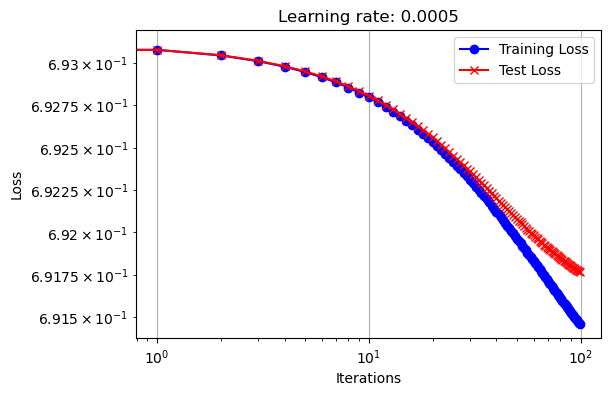

Feature DIFFWALK kept with F1 score: 0.1097


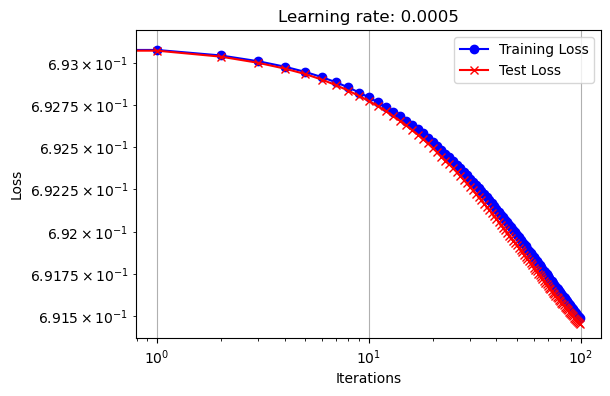

Feature DIFFDRES discarded with F1 score: 0.1053


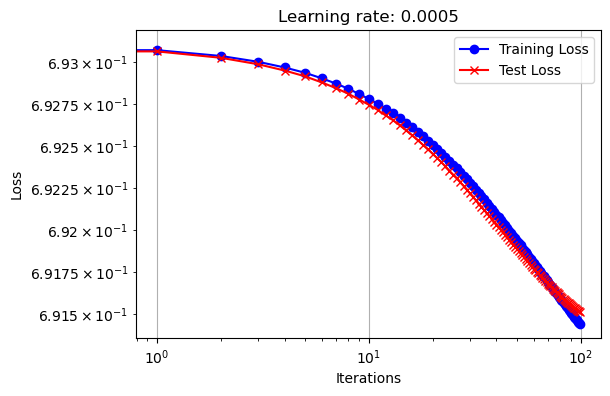

Feature DIFFALON kept with F1 score: 0.1175


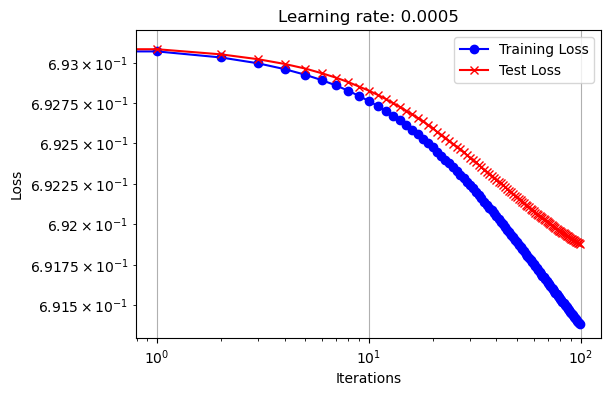

Feature ALCDAY5 discarded with F1 score: 0.1074


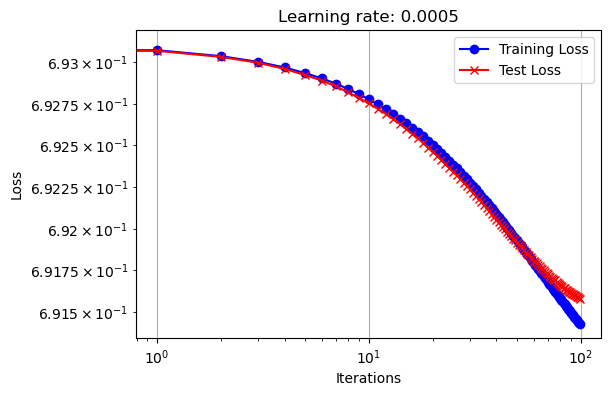

Feature CHECKUP1 discarded with F1 score: 0.1106


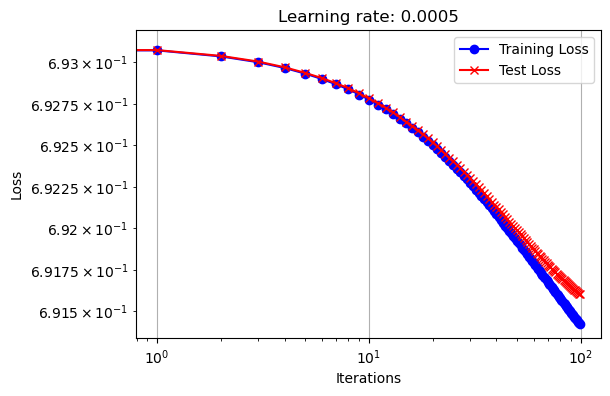

Feature STRENGTH discarded with F1 score: 0.1059


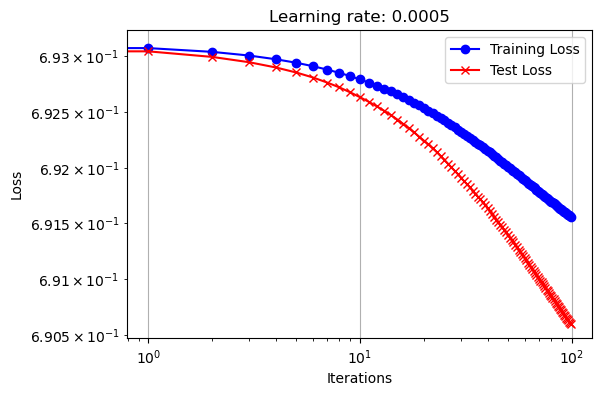

Feature AVG_FRUITS_VEGS kept with F1 score: 0.1225


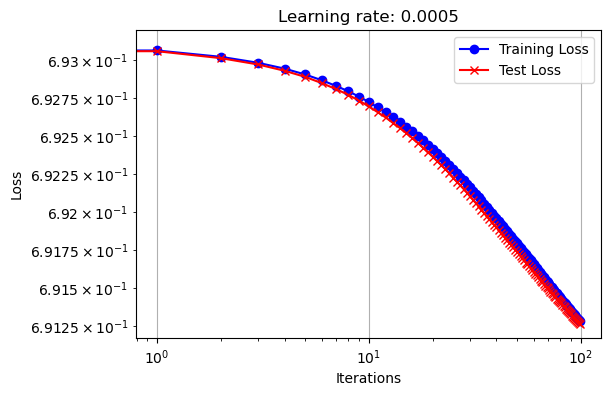

Feature _RFBING5 discarded with F1 score: 0.1132


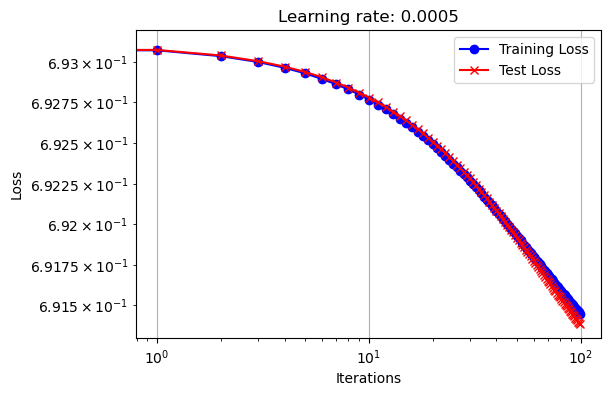

Feature _AGE65YR discarded with F1 score: 0.1178


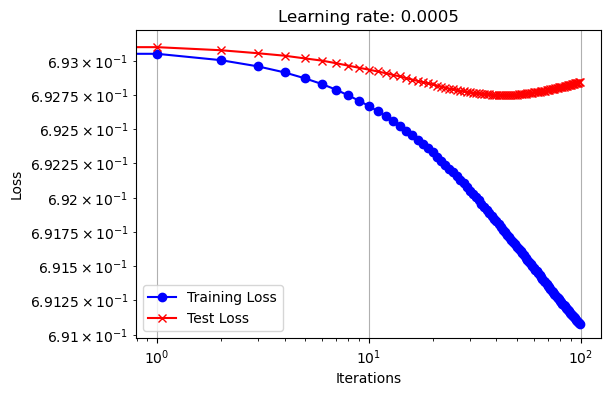

Feature _RFDRHV5 discarded with F1 score: 0.0950


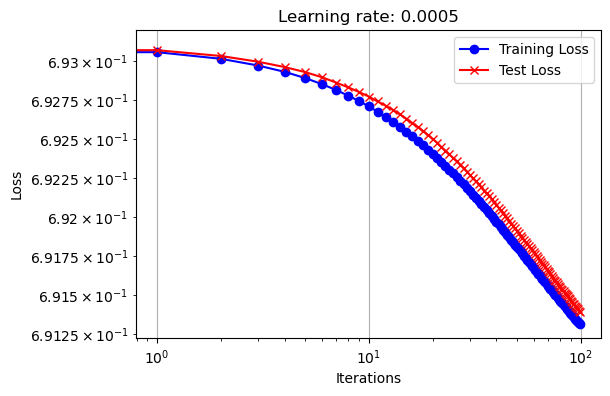

Feature _TOTINDA discarded with F1 score: 0.1104


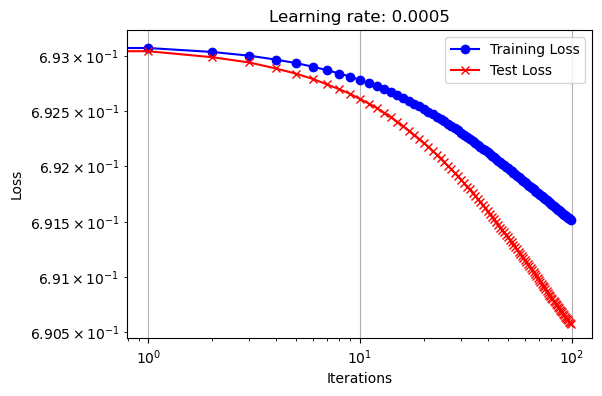

Feature _PAINDX1 kept with F1 score: 0.1247


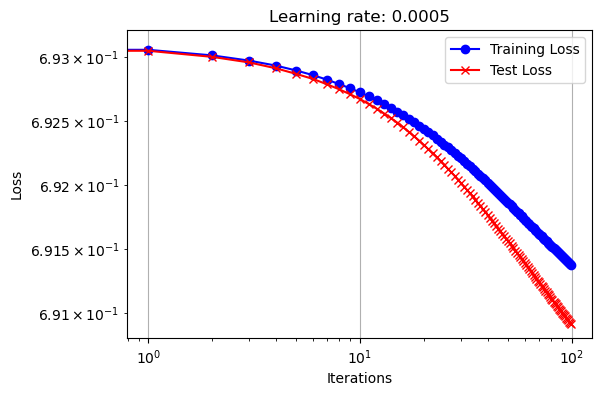

Feature _PASTRNG discarded with F1 score: 0.1164


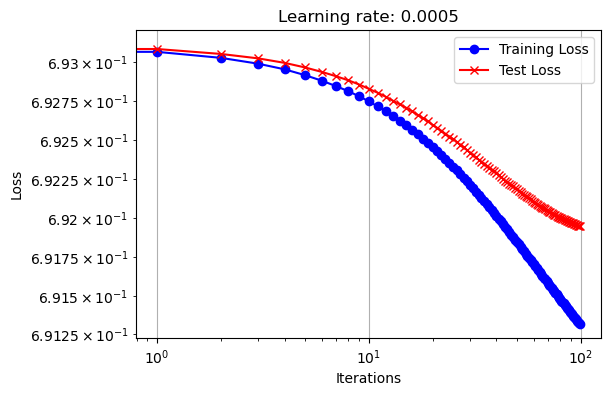

Feature _PASTAE1 discarded with F1 score: 0.1090


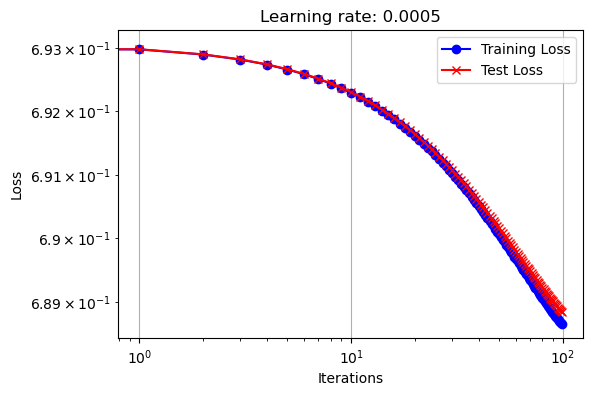

Feature _FLSHOT6 kept with F1 score: 0.2059


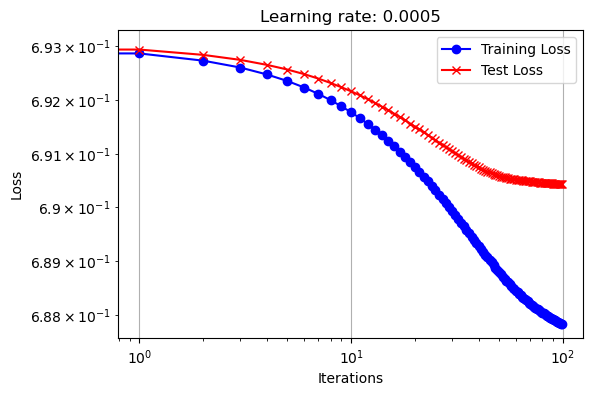

Feature _PNEUMO2 discarded with F1 score: 0.1975


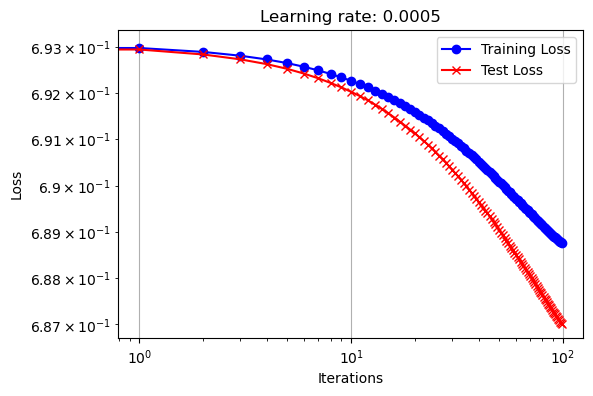

Feature _AIDTST3 kept with F1 score: 0.2383


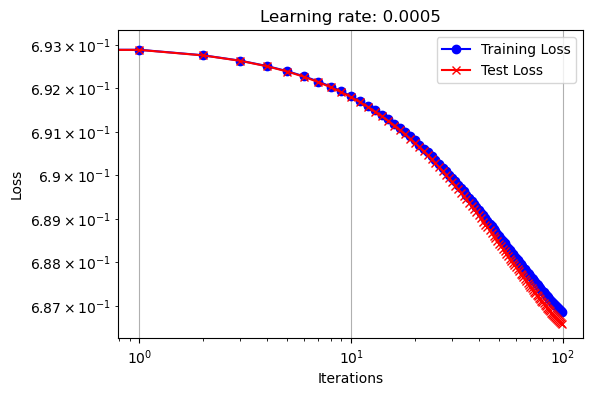

Feature _RFBMI5 discarded with F1 score: 0.2155


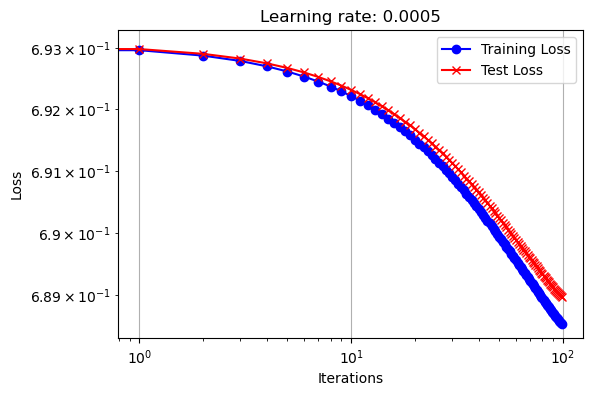

Feature _HISPANC discarded with F1 score: 0.2381


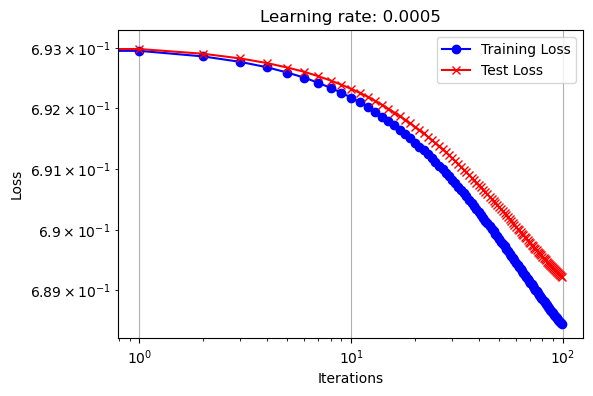

Feature _CASTHM1 kept with F1 score: 0.2413


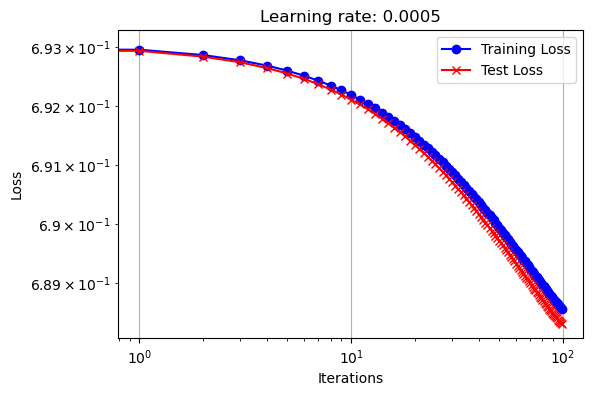

Feature _LTASTH1 kept with F1 score: 0.2451


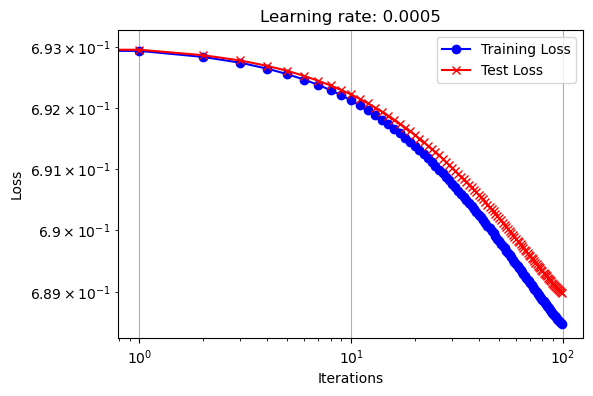

Feature _RFCHOL kept with F1 score: 0.2586


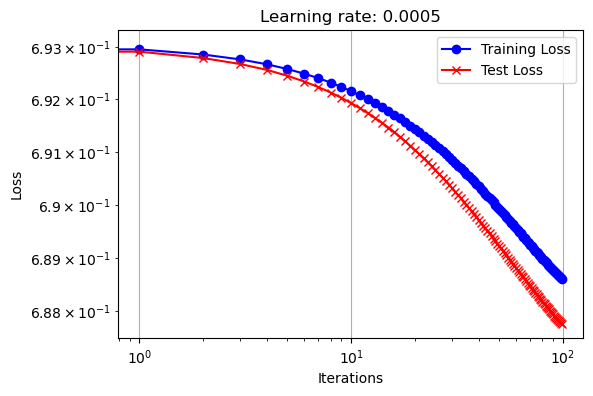

Feature _RFHYPE5 discarded with F1 score: 0.2532


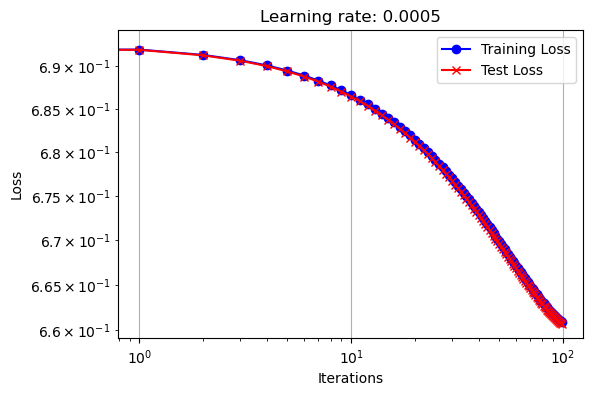

Feature _HCVU651 kept with F1 score: 0.6721


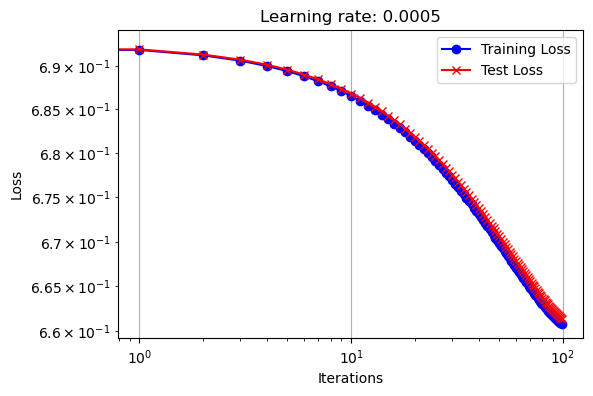

Feature _RFHLTH discarded with F1 score: 0.6686


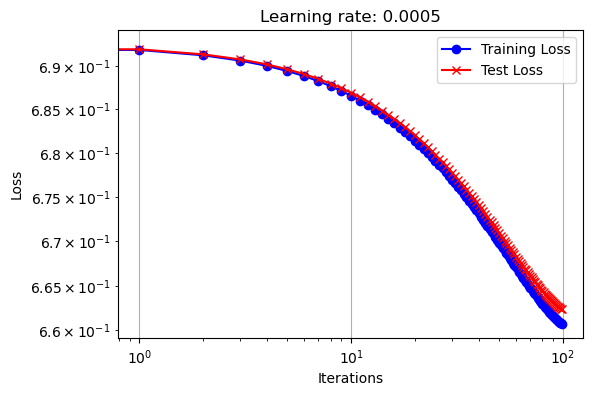

Feature MEDCOST discarded with F1 score: 0.6721


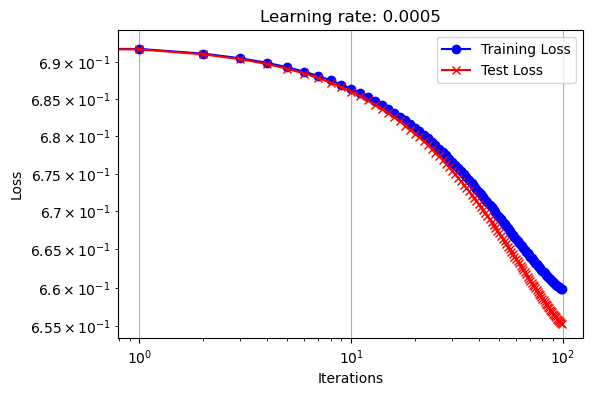

Feature BLOODCHO kept with F1 score: 0.6737


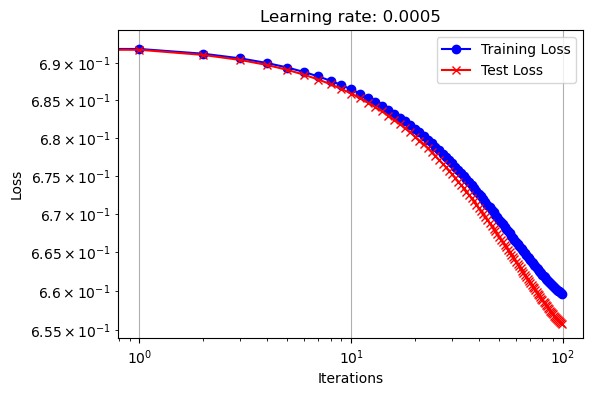

Feature ASTHNOW kept with F1 score: 0.6800


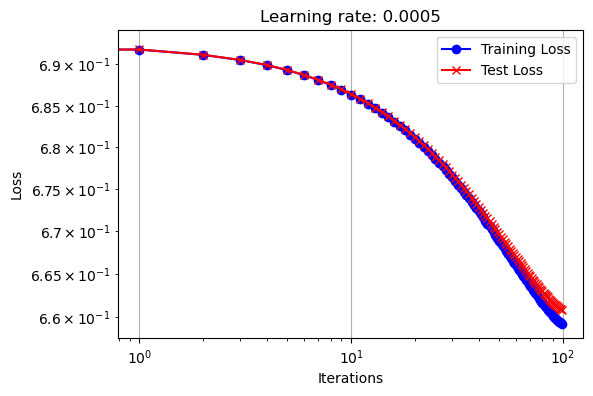

Feature CHCSCNCR discarded with F1 score: 0.6676


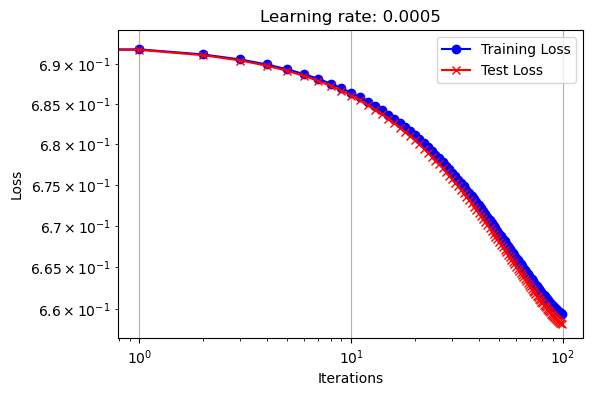

Feature CHCOCNCR discarded with F1 score: 0.6757


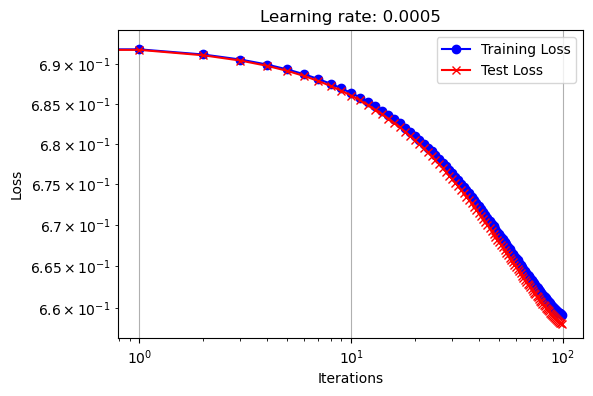

Feature CHCKIDNY discarded with F1 score: 0.6670


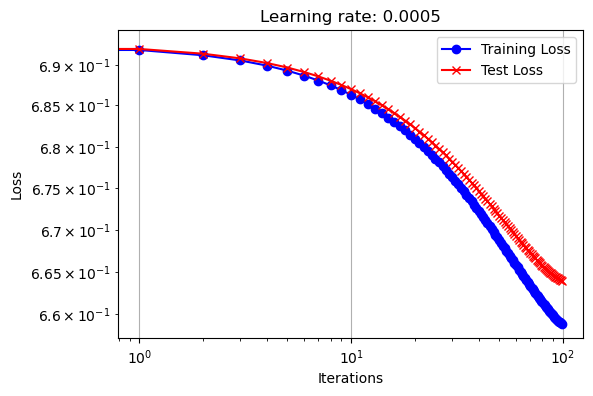

Feature VETERAN3 discarded with F1 score: 0.6624


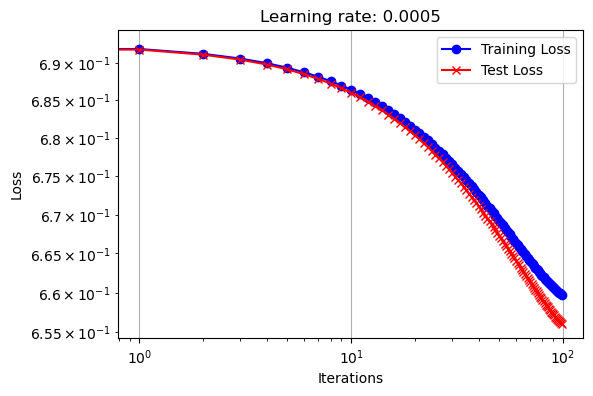

Feature INTERNET discarded with F1 score: 0.6756


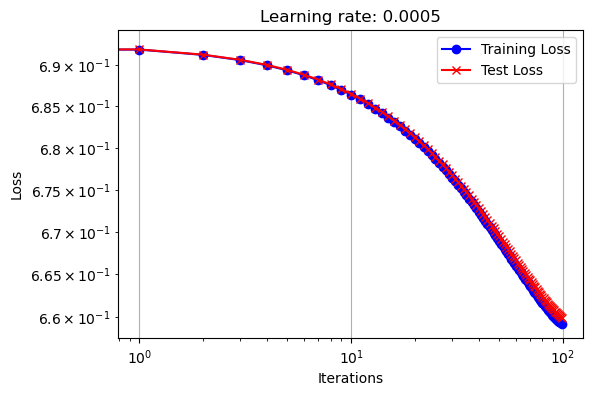

Feature LMTJOIN3 discarded with F1 score: 0.6686


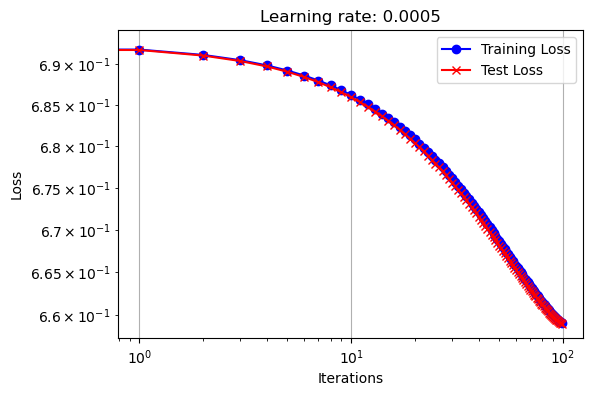

Feature ARTHDIS2 discarded with F1 score: 0.6676


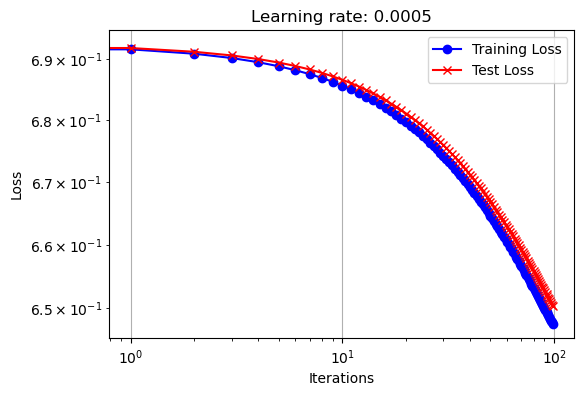

Feature _RACEGR3 discarded with F1 score: 0.6672


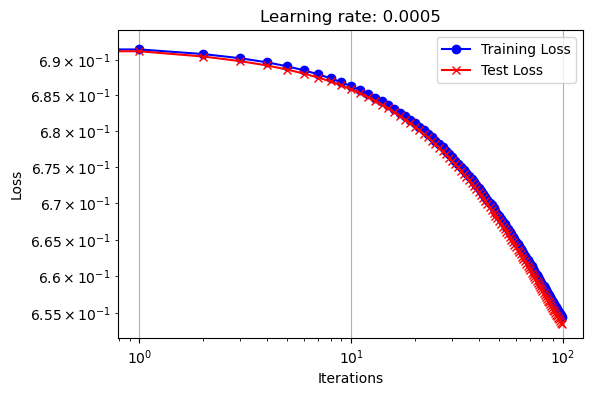

Feature _PAREC1 discarded with F1 score: 0.6694


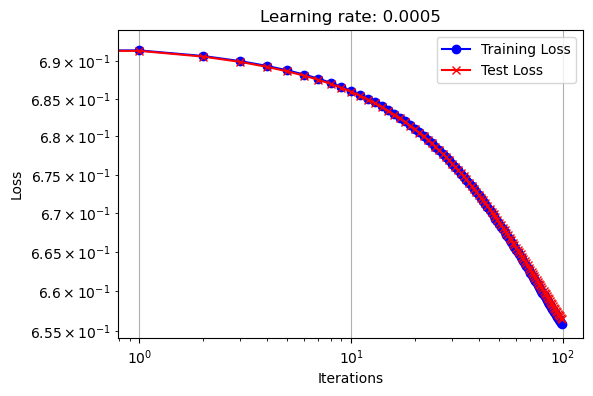

Feature _PA150R2 discarded with F1 score: 0.6625


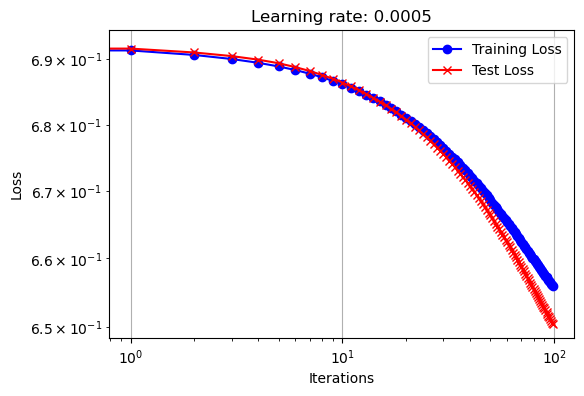

Feature _PACAT1 kept with F1 score: 0.6816


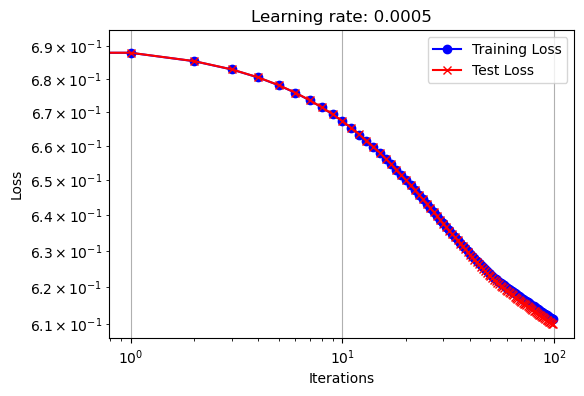

Feature FC60_ discarded with F1 score: 0.6211


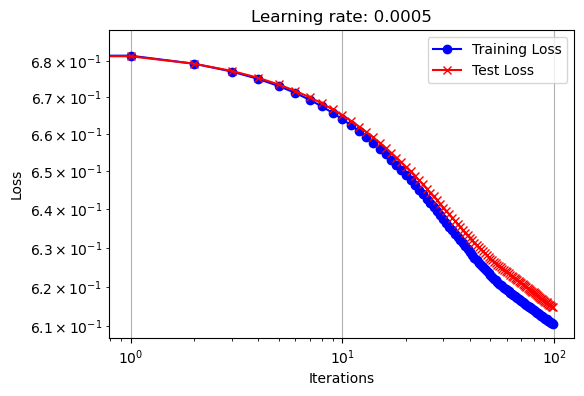

Feature MAXVO2_ discarded with F1 score: 0.6175


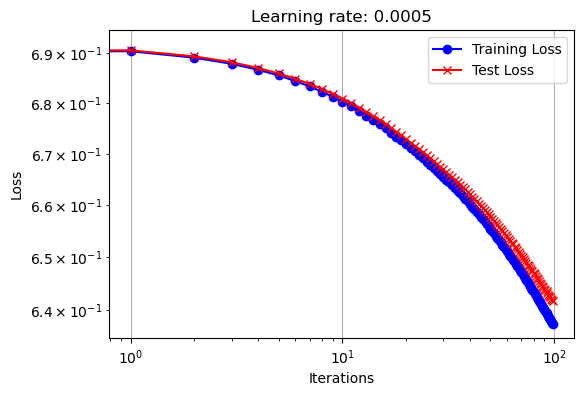

Feature EDUCA discarded with F1 score: 0.6002


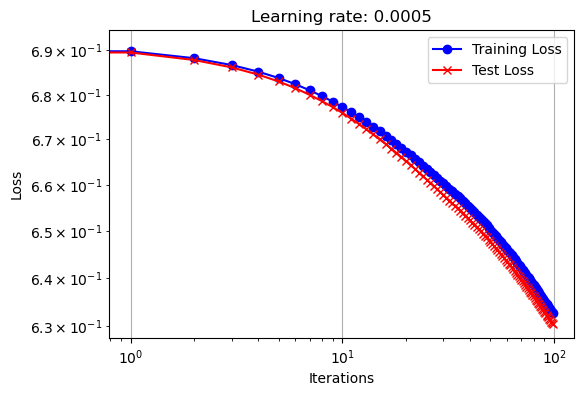

Feature _INCOMG discarded with F1 score: 0.6217


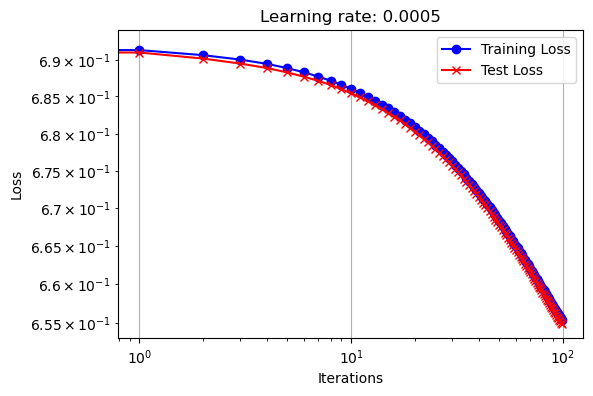

Feature BMI discarded with F1 score: 0.6690


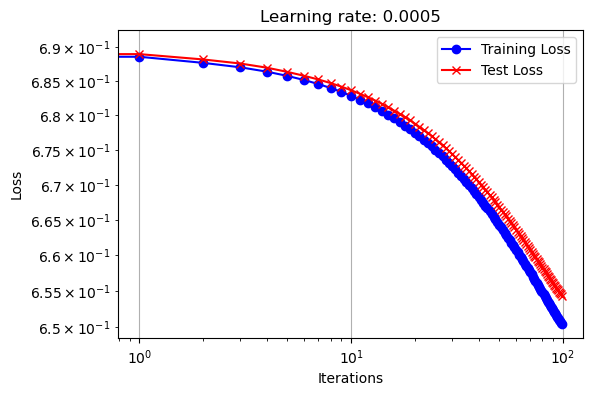

Feature MENTHLTH discarded with F1 score: 0.6709


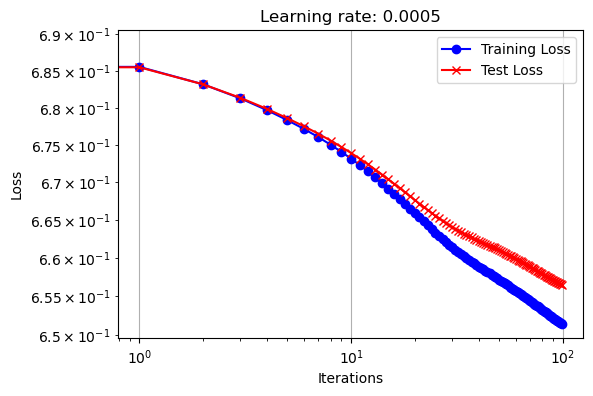

Feature _AGEG5YR discarded with F1 score: 0.6700


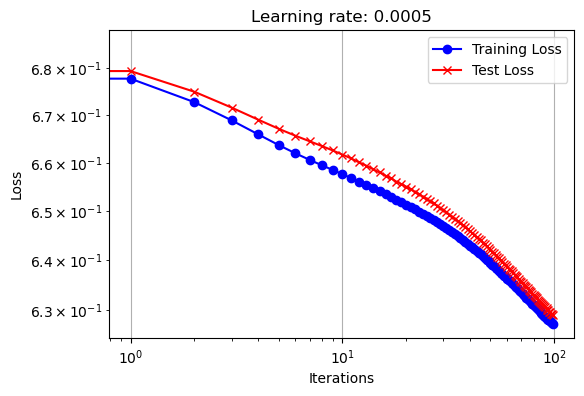

Feature PHYSHLTH discarded with F1 score: 0.6675
Selected features: ['BPMEDS', 'TOLDHI2', 'QLACTLM2', 'ADDEPEV2', 'ASTHMA3', 'SMOKE100', 'CVDSTRK3', 'HAVARTH3', 'DECIDE', 'DIFFWALK', 'DIFFALON', 'AVG_FRUITS_VEGS', '_PAINDX1', '_FLSHOT6', '_AIDTST3', '_CASTHM1', '_LTASTH1', '_RFCHOL', '_HCVU651', 'BLOODCHO', 'ASTHNOW', '_PACAT1']


In [55]:
N = Y_train_balanced.shape[0]
max_iters= 100
gamma=  0.0005
beta1=0.9
beta2=0.97
reg_norm= ['l2', 0.001]
prob_threshold=0.52
batch_size=4096
decay_rate=0.96
decay_steps=100
plot= False
selected_features = []
best_f1_score = 0  # Initialize best F1 score to zero
X_train, features = X_preprocessing(x_train, features)
X_test, _ = X_preprocessing(x_test, features)
X_train_balanced, Y_train_balanced = balance_dataset(X_train, Y_train)

# Iterate over each feature in features_dict
for feature in features_dict.keys():
    # Include selected features + current feature to test
    current_features = selected_features + [feature]
    
    
    # Transform the training and test data for the current feature set
    X_train_transformed = transform_features_column_median(X_train_balanced, 
                                                               {f: features_dict[f] for f in current_features}, 
                                                               features)
    
    # Proportion trainig: 0.9; test: 0.1
    initial_w =  np.random.rand(np.shape(X_train_transformed)[1] ) * 0
    N = np.shape(Y_train_balanced)[0] # number of samples
    random_index = np.random.permutation(N)
    N_train = int(0.9 * N)
    training_index = random_index[:N_train]
    test_index = random_index[N_train:]
    x_tr = X_train_transformed[training_index]
    x_te = X_train_transformed[test_index]
    y_tr = Y_train_balanced[training_index]
    y_te = Y_train_balanced[test_index]       

    # Train the model on the transformed dataset
    w, losses_tr, losses_te = reg_logistic_regression(
         y_tr, x_tr, y_te, x_te, initial_w, max_iters=max_iters,gamma= gamma,reg_norm= reg_norm,batch_size= batch_size, beta1=beta1, beta2=beta2,
    decay_rate=decay_rate, decay_steps=decay_steps
    )
    plot_loss_iter(losses_train=losses_tr, losses_test=losses_te, max_iters=max_iters, gamma=gamma)
    
    # Predict on the test data
    y_prob = sigmoid(x_te @ w)
    y_pred = np.where(y_prob < prob_threshold, 0, 1)

   
    # Calculate accuracy and F1 score
    accuracy, f1_score = F1_score_f(y_te, y_pred, plot=False)
    
    # Check if the F1 score improves
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        selected_features.append(feature)  # Keep the feature
        print(f"Feature {feature} kept with F1 score: {f1_score:.4f}")
    else:
        print(f"Feature {feature} discarded with F1 score: {f1_score:.4f}")

# Final model training on the selected features
X_train_final = transform_features_column_median(X_train_balanced, {f: features_dict[f] for f in selected_features}, features)


final_w, losses_tr, losses_te = reg_logistic_regression(
     y_tr, x_tr, y_te, x_te, initial_w, max_iters=max_iters,
    gamma=gamma, reg_norm=reg_norm, batch_size=batch_size, beta1=beta1, beta2=beta2,
    decay_rate=decay_rate, decay_steps=decay_steps
)



print("Selected features:", selected_features)